In [1]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import InputLayer, Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255

In [4]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes) 

In [5]:
input_size = 784 # 입력 갯수
batch_size = 100 # 한번에 학습할 데이터 갯수
epochs = 20 # 학습 반복횟수

In [6]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Dense(400)) 
model.add(Activation('relu'))     
model.add(Dense(classes))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 activation (Activation)     (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                4010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


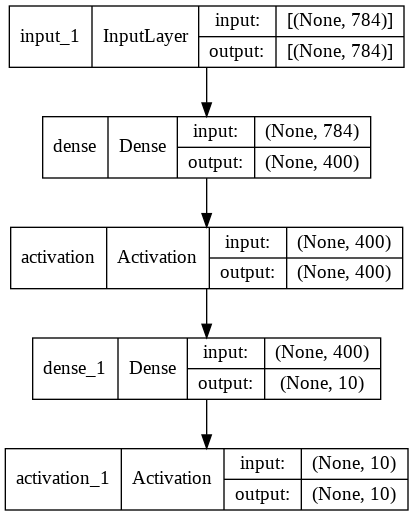

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [9]:
optimizer = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2080 - accuracy: 0.9371
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1198 - accuracy: 0.9650
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0948 - accuracy: 0.9729
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0853 - accuracy: 0.9760
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0805 - accuracy: 0.9775
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0643 - accuracy: 0.9822
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0653 - accuracy: 0.9823
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0586 - accuracy: 0.9845
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0500 - accuracy: 0.9869
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0574 - accuracy: 0.9855

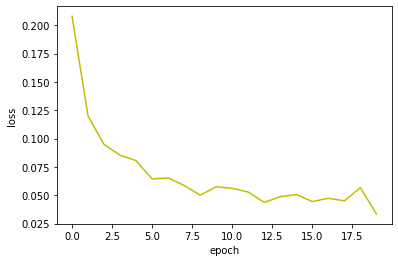

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'y', label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

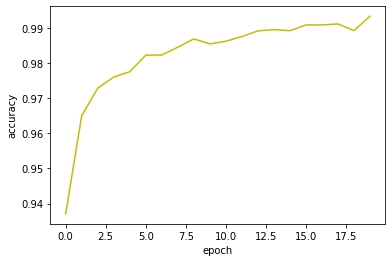

In [12]:
plt.plot(history.history['accuracy'], 'y', label='train acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [13]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

313/313 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.9718

Test accuracy: 0.9718000292778015


In [14]:
preds = model.predict(X_test)

In [15]:
y_true = np.argmax(Y_test, axis=1)
preds = np.argmax(preds, axis=1)

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

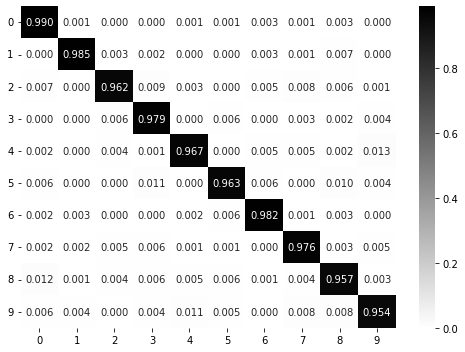

In [17]:
x_lab = [0,1,2,3,4,5,6,7,8,9]
y_lab = [0,1,2,3,4,5,6,7,8,9]

conf_matrix = confusion_matrix(y_true, preds)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()

In [18]:
from sklearn.metrics import classification_report

In [19]:
print('Classification Report')
print(classification_report(y_true, preds, digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9642    0.9898    0.9768       980
           1     0.9903    0.9850    0.9876      1135
           2     0.9783    0.9622    0.9702      1032
           3     0.9630    0.9792    0.9710      1010
           4     0.9764    0.9674    0.9719       982
           5     0.9717    0.9630    0.9673       892
           6     0.9772    0.9823    0.9797       958
           7     0.9700    0.9757    0.9728      1028
           8     0.9549    0.9569    0.9559       974
           9     0.9698    0.9544    0.9620      1009

    accuracy                         0.9718     10000
   macro avg     0.9716    0.9716    0.9715     10000
weighted avg     0.9719    0.9718    0.9718     10000

